# CA1 CLASSIFICATION

## Importing Data

In [371]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve

In [372]:
df = pd.read_csv("factory_data.csv", sep= ',')

## Data Exploration

In [373]:
df.head(10)

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0
2,3,T20224,L,24.95,35.35,1498.0,49.4,5,0
3,4,Z33024,L,25.05,35.45,1433.0,39.5,7,0
4,5,Z52839,L,25.05,35.55,1408.0,40.0,9,0
5,6,K53611,M,24.95,35.45,1425.0,41.9,11,0
6,7,K40563,L,24.95,NaN,NaN,42.4,14,0
7,8,T39301,L,24.95,35.45,1527.0,40.2,16,0
8,9,S84663,M,25.15,35.55,1667.0,28.6,18,0
9,10,Z56249,M,25.35,35.85,1741.0,28.0,21,0


In [374]:
df.shape

(20000, 9)

In [375]:
df.dtypes

Unique ID                 int64
Product ID               object
Quality                  object
Ambient T (C)           float64
Process T (C)           float64
Rotation Speed (rpm)    float64
Torque (Nm)             float64
Tool Wear (min)           int64
Machine Status            int64
dtype: object

In [376]:
# since quality is neither a float or integer, the datatype will need to be changed later

In [377]:
df.describe()

,Unique ID,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
count,20000.000000,20000.000000,19600.000000,18812.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,26.904930,36.904291,1538.795397,39.986910,107.951000,0.033900
std,5773.647028,2.000834,1.483647,178.674963,9.968684,63.652555,0.180976
min,1.000000,22.150000,32.550000,1168.000000,3.800000,0.000000,0.000000
25%,5000.750000,25.250000,35.750000,1423.000000,33.200000,53.000000,0.000000
50%,10000.500000,26.950000,36.950000,1503.000000,40.100000,108.000000,0.000000
75%,15000.250000,28.450000,37.950000,1613.000000,46.800000,162.000000,0.000000
max,20000.000000,31.450000,40.750000,2886.000000,76.600000,253.000000,1.000000


In [378]:
# Features like Tool Wear(min) has a large range and will need to be standardized which we will be carrying out later

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unique ID             20000 non-null  int64  
 1   Product ID            20000 non-null  object 
 2   Quality               19009 non-null  object 
 3   Ambient T (C)         20000 non-null  float64
 4   Process T (C)         19600 non-null  float64
 5   Rotation Speed (rpm)  18812 non-null  float64
 6   Torque (Nm)           20000 non-null  float64
 7   Tool Wear (min)       20000 non-null  int64  
 8   Machine Status        20000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [380]:
# The shape is 20000,9 so we can already tell that there are missing values

## Data Cleaning

In [381]:
df.isna().sum()

Unique ID                  0
Product ID                 0
Quality                  991
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

In [382]:
# for the quality i will be filling in the null values with the mode

In [383]:
df["Quality"].mode()[0]

'L'

In [384]:
df['Quality'].fillna(df['Quality'].mode()[0],inplace=True)

In [385]:
df.isna().sum()

Unique ID                  0
Product ID                 0
Quality                    0
Ambient T (C)              0
Process T (C)            400
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

In [386]:
# I think that it is better to fill all the null values for process temperature with the mean 

In [387]:
df['Process T (C)'].mean()

36.90429081632673

In [388]:
df['Process T (C)'].fillna(df['Process T (C)'].mean(),inplace=True)

In [389]:
df.isna().sum()

Unique ID                  0
Product ID                 0
Quality                    0
Ambient T (C)              0
Process T (C)              0
Rotation Speed (rpm)    1188
Torque (Nm)                0
Tool Wear (min)            0
Machine Status             0
dtype: int64

In [390]:
# for rotation speed i decided to fill the null values with the median

In [391]:
df['Rotation Speed (rpm)'].median()

1503.0

In [392]:
df['Rotation Speed (rpm)'].fillna(df['Rotation Speed (rpm)'].median(),inplace=True)

In [393]:
df.isna().sum()

Unique ID               0
Product ID              0
Quality                 0
Ambient T (C)           0
Process T (C)           0
Rotation Speed (rpm)    0
Torque (Nm)             0
Tool Wear (min)         0
Machine Status          0
dtype: int64

In [394]:
# there are now no more null values so we are ready to go to feature engineering

## Feature Engineering

In [395]:
df.head(2)

,Unique ID,Product ID,Quality,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status
0,1,K12965,M,24.95,35.45,1551.0,42.8,0,0
1,2,Z62710,L,25.05,35.55,1408.0,46.3,3,0


In [396]:
# I will be making binary columns for each quality level to show if it is the specific quality or not e.g if it is low or not
# low

In [397]:
df['Low'] = df['Quality'].apply(lambda x:1 if 'L' in x else 0)
df['Medium'] = df['Quality'].apply(lambda x:1 if 'M' in x else 0)
df['High'] = df['Quality'].apply(lambda x:1 if 'H' in x else 0)

In [398]:
df['Low'] = df['Low'].apply(pd.to_numeric)
df['Medium'] = df['Medium'].apply(pd.to_numeric)
df['High'] = df['High'].apply(pd.to_numeric)

In [399]:
df = df.drop('Quality', axis=1)

In [400]:
# the model will not be able to process Quality since it is in string so I have encoded it into integers

In [401]:
df.head(3)

,Unique ID,Product ID,Ambient T (C),Process T (C),Rotation Speed (rpm),Torque (Nm),Tool Wear (min),Machine Status,Low,Medium,High
0,1,K12965,24.95,35.45,1551.0,42.8,0,0,0,1,0
1,2,Z62710,25.05,35.55,1408.0,46.3,3,0,1,0,0
2,3,T20224,24.95,35.35,1498.0,49.4,5,0,1,0,0


In [402]:
# next i check the correlation between each feature and the output variable

In [403]:
df.corr()['Machine Status'].sort_values(ascending=False)

Machine Status          1.000000
Torque (Nm)             0.191321
Tool Wear (min)         0.105448
Ambient T (C)           0.082530
Process T (C)           0.035538
Low                     0.033160
Unique ID              -0.011446
Medium                 -0.020872
High                   -0.022671
Rotation Speed (rpm)   -0.044214
Name: Machine Status, dtype: float64

## Explory Data Analysis

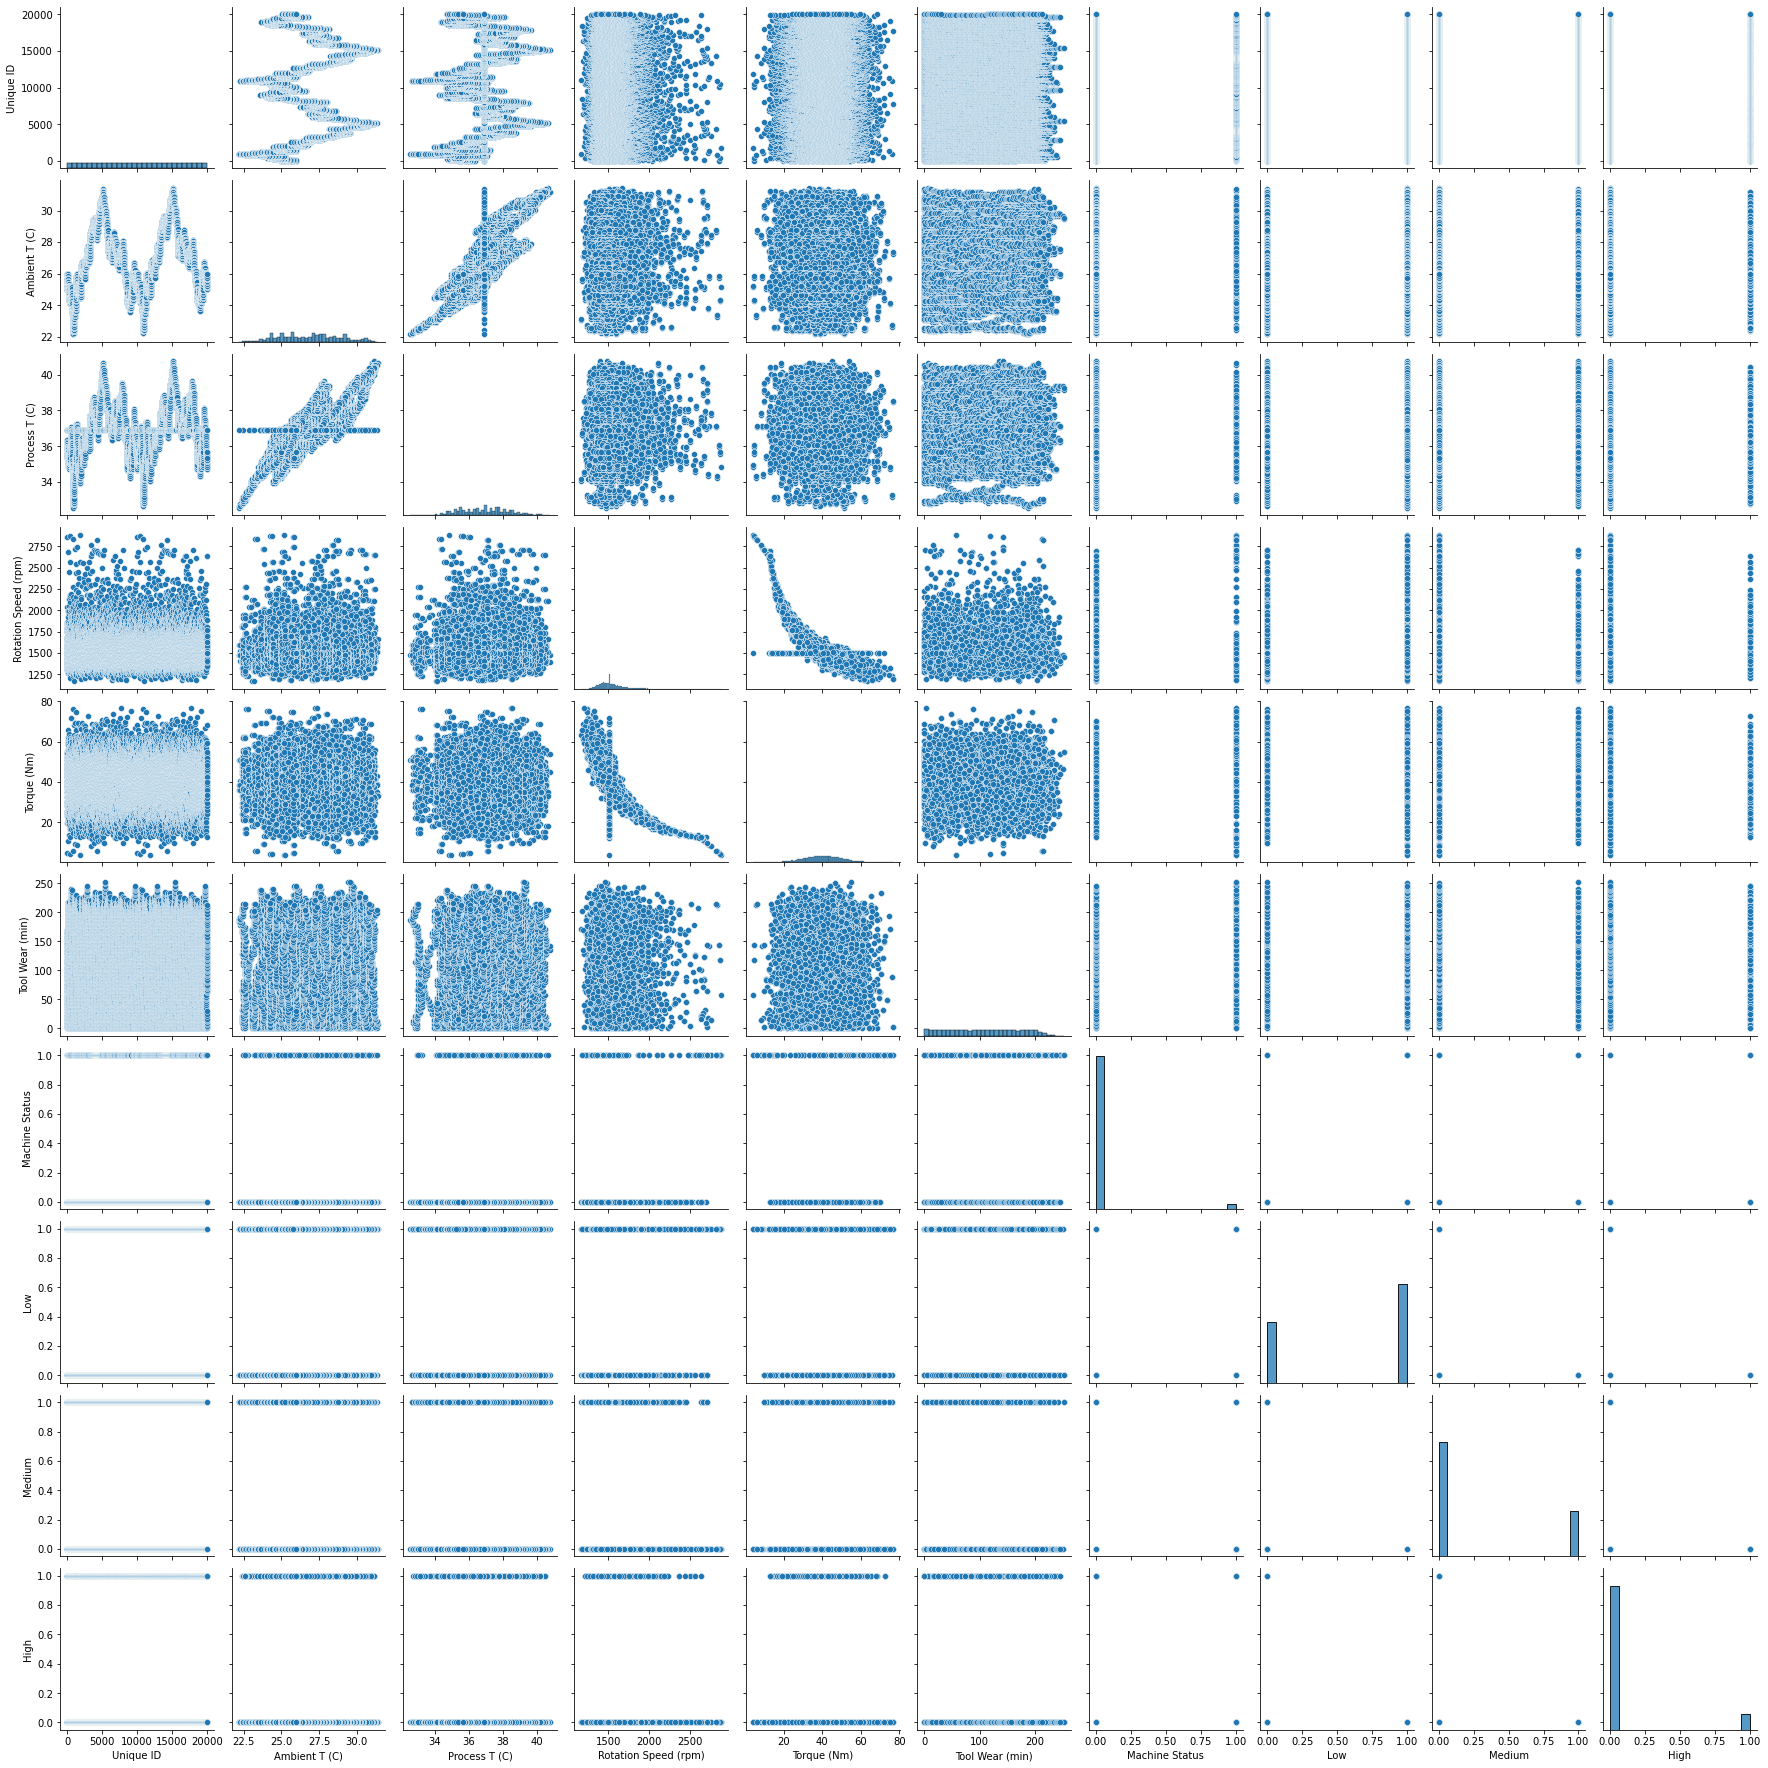

In [404]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic correlogram
sns.pairplot(df)
plt.show()

In [407]:
# this pairplot is jsut to see the correlation overview

<AxesSubplot:xlabel='Ambient T (C)', ylabel='Density'>

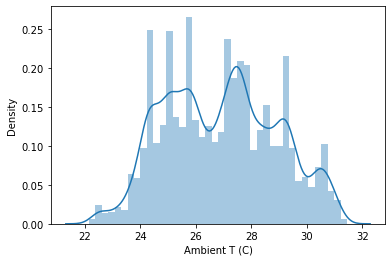

In [408]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df["Ambient T (C)"])

<AxesSubplot:xlabel='Process T (C)', ylabel='Density'>

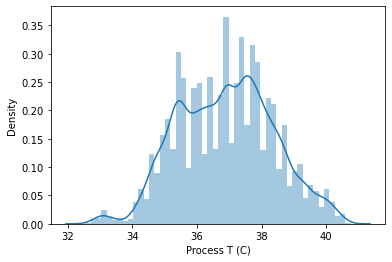

In [409]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df["Process T (C)"])

<AxesSubplot:xlabel='Tool Wear (min)', ylabel='Count'>

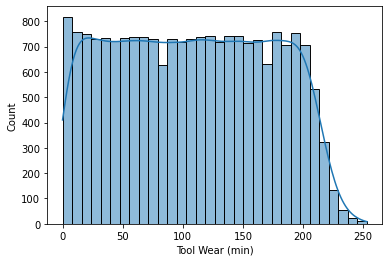

In [410]:
sns.histplot(data=df, x=df['Tool Wear (min)'], kde=True)

<AxesSubplot:xlabel='Rotation Speed (rpm)', ylabel='Count'>

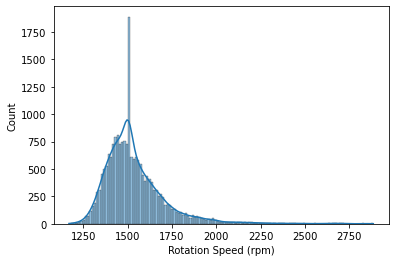

In [411]:
sns.histplot(data=df, x=df['Rotation Speed (rpm)'], kde=True)

<AxesSubplot:xlabel='Torque (Nm)', ylabel='Count'>

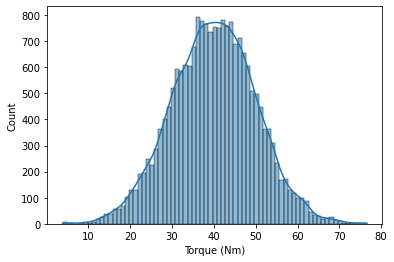

In [412]:
sns.histplot(data=df, x=df['Torque (Nm)'], kde=True)

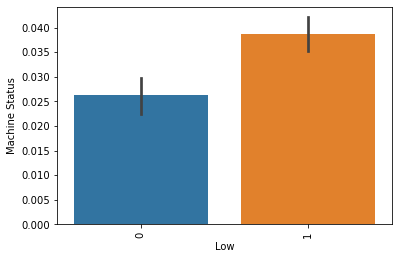

In [413]:
sns.barplot(x=df['Low'],y=df['Machine Status'])
plt.xticks(rotation='vertical')
plt.show()

In [414]:
df.corr()['Machine Status'].sort_values(ascending=False)

Machine Status          1.000000
Torque (Nm)             0.191321
Tool Wear (min)         0.105448
Ambient T (C)           0.082530
Process T (C)           0.035538
Low                     0.033160
Unique ID              -0.011446
Medium                 -0.020872
High                   -0.022671
Rotation Speed (rpm)   -0.044214
Name: Machine Status, dtype: float64

How do you represent your data as features?
I drop useless features. I assign X to the remaining features. X represents my features

In [ ]:
df2 = df.drop(['Unique ID','Product ID','Rotation Speed (rpm)','Medium','High'],axis = 1)
df2.head(3)

In [ ]:
y = df2['Machine Status'].values
X = df2.drop('Machine Status',axis = 1).values

# MODEL SELECTION

## KNN Classifier

In [416]:
y = df2['Machine Status'].values
X = df2.drop('Machine Status',axis = 1).values

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[3848   16]
 [  85   51]]


In [418]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3864
           1       0.76      0.38      0.50       136

    accuracy                           0.97      4000
   macro avg       0.87      0.69      0.74      4000
weighted avg       0.97      0.97      0.97      4000



## Logistic Regression

In [419]:
y = df2['Machine Status'].values
X = df2.drop('Machine Status',axis = 1).values

In [420]:
# building the logistic regression model
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42,stratify=y)
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[7728    1]
 [ 246   25]]


In [421]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7729
           1       0.96      0.09      0.17       271

    accuracy                           0.97      8000
   macro avg       0.97      0.55      0.58      8000
weighted avg       0.97      0.97      0.96      8000



## Decision Tree

In [357]:
 from sklearn.tree import DecisionTreeClassifier

In [358]:
y = df2['Machine Status'].values
X = df2.drop('Machine Status',axis = 1)

In [359]:
X_train , X_test , y_train , y_test = train_test_split ( X, y,test_size = 0.3 , random_state = 42,stratify=y)

In [360]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [361]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5797
           1       0.79      0.83      0.81       203

    accuracy                           0.99      6000
   macro avg       0.89      0.91      0.90      6000
weighted avg       0.99      0.99      0.99      6000



## Random Forest

In [362]:
y = df2['Machine Status'].values
X = df2.drop('Machine Status',axis = 1)

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [364]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=100)
clf = RandomForestClassifier(n_estimators=100, random_state=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred= clf.predict(X_test)

In [365]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5797
           1       0.91      0.66      0.76       203

    accuracy                           0.99      6000
   macro avg       0.95      0.83      0.88      6000
weighted avg       0.99      0.99      0.99      6000



## Hyperparameter Tuning for Decision Tree Classifier

In [ ]:
Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
Yes, I tuned it using a pipeline on my decision tree classifier to cross-validate and scale at one go. My params are max_depth
and min_samples_leaf. I am using StandardScaler and I set cv=5 so that a 5-fold cross validation will be carried out.I set the
scoring to f1 since that is the metric we will be checking to evaluate the performance.

In [370]:
from sklearn.model_selection import GridSearchCV

steps = [('scaler', StandardScaler()),
         ('DT', DecisionTreeClassifier())]

pipeline = Pipeline(steps)


params = {
    'DT__max_depth':np.arange(1,30),
    'DT__min_samples_leaf':[1,2,4,5,10,20,30,40,80,100],
    'DT__max_features': ['sqrt', 'log2',0.2,0.4,0.6,0.8],
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

clf = GridSearchCV(pipeline, param_grid=params,cv=5,scoring='f1')

clf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

print("f1 score: {}".format(clf.score(X_test, y_test)))

f1 score: 0.7586206896551724


In [431]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X,y,cv=5)

array([0.991  , 0.98525, 0.9955 , 0.98   , 0.99025])

In [ ]:
# the cross validation scores are high indicating that the model perfroms well on unseen data

In [368]:
print("Tuned Model Parameters: {}".format(clf.best_params_))

Tuned Model Parameters: {'DT__max_depth': 29, 'DT__max_features': 0.6, 'DT__min_samples_leaf': 1}


In [ ]:
# fitting in the best params into the model

In [424]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
clf = DecisionTreeClassifier(max_depth=29,
                           max_features=0.6,
                           min_samples_leaf=1,
                           random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit dt to the training set
clf.fit(X_train, y_train)


# Compute y_pred
y_pred = clf.predict(X_test)

# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)

print("f1 score: {}".format(clf.score(X_test, y_test)))

f1 score: 0.9808333333333333


In [426]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5790
           1       0.73      0.73      0.73       210

    accuracy                           0.98      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.98      0.98      0.98      6000



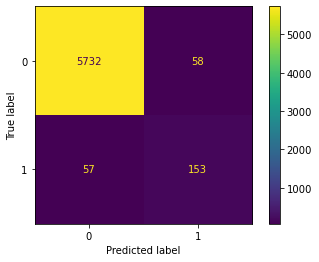

In [427]:
plot_confusion_matrix(clf,X_test,y_test,values_format='d' )

In [430]:
# STUPID BASELINE
import numpy as np
from sklearn.dummy import DummyClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X, y)
dummy_clf.predict(X)
dummy_clf.score(X, y)

0.498